<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass3/hpdp/CapKetereh/CapKetereh_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
credit source: https://www.kaggle.com/datasets/lorentzyeung/price-paid-data-202304/data
## Introduction
This dataset provides comprehensive information on property sales in England and Wales, as sourced from the UK government's HM Land Registry. It offers valuable insights into property transactions, including sale prices, locations, and types of properties sold. This dataset is particularly useful for analysts, researchers, and businesses looking to understand market trends, property valuations, and investment opportunities in the real estate sector of England and Wales.

## Summary of Results
The dataset contains records of property sales dating back to January 1995, up to the most recent monthly data. It covers various types of transactions, from residential to commercial properties, providing a holistic view of the real estate market in England and Wales.

## Column Descriptions
colnames=['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
'postcode', 'Property_Type', 'Old/New',
'Duration', 'PAON', 'SAON',
'Street', 'Locality', 'Town/City',
'District', 'County', 'PPDCategory_Type',
'Record_Status - monthly_file_only'
]

### Address data Explaination
- Postcode: The postal code where the property is located.
- PAON (Primary Addressable Object Name): Typically the house number or name.
- SAON (Secondary Addressable Object Name): Additional information if the building is divided into flats or sub-buildings.
- Street: The street name where the property is located.
- Locality: Additional locality information.
- Town/City: The town or city where the property is located.
- District: The district in which the property resides.
- County: The county where the property is located.
- Price Paid: The price for which the property was sold.

## Legal and Ethical Considerations
### Ownership and Attribution
This dataset is the property of HM Land Registry and is released under the Open Government Licence (OGL). If you use or publish this dataset, you are required to include the following attribution statement:

>"Contains HM Land Registry data © Crown copyright and database right 2021. This data is licensed under the Open Government Licence v3.0."

## Usage Guidelines
The data can be used for both commercial and non-commercial purposes.

The OGL does not cover third-party rights, which HM Land Registry is not authorized to license.
For any other use of the Address Data, you must contact Royal Mail.

## Suggested Usages
- Market Trend Analysis: Understand the ups and downs of the property market over time.
- Investment Research: Identify potential areas for property investment.
- Academic Studies: Use the data for economic research and studies related to the housing market.
- Policy Making: Assist government agencies in making informed decisions regarding housing policies.
- Real Estate Apps: Integrate the data into apps that provide property price information services.

By using this dataset, you agree to abide by the terms and conditions as specified by HM Land Registry. Failure to do so may result in legal consequences.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class DfOverview:
    """
        Give an overview for a given data frame,
        like null persentage for each columns,
        unique value percentage for each columns and more
    """

    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def missing_value(self) -> None:
        nullSum = self.df.isna().sum()
        return [col for col in nullSum]

    def percentage(self, list):
        return [str(round(((value / self.df.shape[0]) * 100), 2)) + '%' for value in list]

    def getOverview(self) -> None:

        _columns = [column for column in self.df]
        _count = self.df.count().values
        _unique = [self.df[column].value_counts().shape[0] for column in self.df]
        _missing_values = self.missing_value()

        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype']
        data = zip(
            _columns,
            _count,
            _missing_values,
            self.percentage(_missing_values),
            _unique,
            self.percentage(_unique),
            self.df.dtypes
        )
        new_df = pd.DataFrame(data=data, columns=columns)
        return new_df

In [ ]:
def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

In [ ]:
def percent_missing_values(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [ ]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending and remove columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,0] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
def convert_to_string(df, columns):
    for col in columns:
        df[col] = df[col].astype("string")

In [ ]:
def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace=True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("No duplicate rows were found.")
    else:
        print(f"{count} duplicate rows were found and removed.")

def plot_dist(df:pd.DataFrame, column:str, color:str='cornflowerblue')->None:
    sns.displot(data=df, x=column, color=color,  kde=False, height=6, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plotly_plot_bar(df, x, y, title=None, width=800, color=['cornflowerblue']):
    if title == None:
        title=f'Distribution of {x}'
    fig = px.bar(df, x=x, y=y, title=title)
    return Image(pio.to_image(fig, format='png', width=width))

def plotly_plot_pie(df, column, title=None, width=800, limit=None):
    a = pd.DataFrame({'count': df.groupby([column]).size()}).reset_index()
    a = a.sort_values("count", ascending=False)
    if limit:
        a.loc[a['count'] < limit, column] = f'Other {column}s'
    if title == None:
        title=f'Distribution of {column}'
    fig = px.pie(a, values='count', names=column, title=title)
    return Image(pio.to_image(fig, format='png', width=width))

### 1. Import dataset
#### The dataset has 28 million lines with 16 columns. Machine can not read this big data so we used other method where we only read 10% of our dataset.

In [ ]:
# Import dataset
df = pd.read_csv("202304.csv")
df

,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07 00:00,MK15 9HP,D,N,F,31,Unnamed: 8,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES.1,MILTON KEYNES.2,A,A.1
0,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,NaN,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
1,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,NaN,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
2,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28 00:00,B90 4TG,T,N,F,37,NaN,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
3,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,NaN,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A
4,{AE76CAF1-F8CC-43F9-8F63-4F48A2857D41},17000,1995-03-10 00:00,S65 1QJ,T,N,L,22,NaN,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28276222,{F3B6C198-17C3-6E40-E053-6C04A8C0B3B4},490000,2023-01-13 00:00,RM1 4SR,T,N,F,12,NaN,HEATHER GLEN,NaN,ROMFORD,HAVERING,GREATER LONDON,A,A
28276223,{F3B6C198-17C9-6E40-E053-6C04A8C0B3B4},365000,2023-01-10 00:00,SS2 4UA,F,N,L,"CENTENARY PLACE, 1",FLAT 22,SOUTHCHURCH BOULEVARD,NaN,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,A,A
28276224,{F3B6C198-17D8-6E40-E053-6C04A8C0B3B4},730000,2023-01-05 00:00,CO13 0EY,S,N,F,HIGH VIEW,NaN,LITTLE CLACTON ROAD,GREAT HOLLAND,FRINTON-ON-SEA,TENDRING,ESSEX,A,A
28276225,{F3B6C198-1807-6E40-E053-6C04A8C0B3B4},379000,2023-01-06 00:00,CO15 5NA,D,N,F,12,NaN,DULWICH ROAD,HOLLAND-ON-SEA,CLACTON-ON-SEA,TENDRING,ESSEX,A,A


### 2. Add column names to the dataset
#### Our dataset does not have column names so we add column names.

In [ ]:
# adding column name to the respective columns
df.columns =['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
'postcode', 'Property_Type', 'Old/New',
'Duration', 'PAON', 'SAON',
'Street', 'Locality', 'Town/City',
'District', 'County', 'PPDCategory_Type',
'Record_Status - monthly_file_only'
]
df

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only
0,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,NaN,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
1,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,NaN,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
2,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28 00:00,B90 4TG,T,N,F,37,NaN,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
3,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,NaN,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A
4,{AE76CAF1-F8CC-43F9-8F63-4F48A2857D41},17000,1995-03-10 00:00,S65 1QJ,T,N,L,22,NaN,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28276222,{F3B6C198-17C3-6E40-E053-6C04A8C0B3B4},490000,2023-01-13 00:00,RM1 4SR,T,N,F,12,NaN,HEATHER GLEN,NaN,ROMFORD,HAVERING,GREATER LONDON,A,A
28276223,{F3B6C198-17C9-6E40-E053-6C04A8C0B3B4},365000,2023-01-10 00:00,SS2 4UA,F,N,L,"CENTENARY PLACE, 1",FLAT 22,SOUTHCHURCH BOULEVARD,NaN,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,A,A
28276224,{F3B6C198-17D8-6E40-E053-6C04A8C0B3B4},730000,2023-01-05 00:00,CO13 0EY,S,N,F,HIGH VIEW,NaN,LITTLE CLACTON ROAD,GREAT HOLLAND,FRINTON-ON-SEA,TENDRING,ESSEX,A,A
28276225,{F3B6C198-1807-6E40-E053-6C04A8C0B3B4},379000,2023-01-06 00:00,CO15 5NA,D,N,F,12,NaN,DULWICH ROAD,HOLLAND-ON-SEA,CLACTON-ON-SEA,TENDRING,ESSEX,A,A


### 3. Display data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28276227 entries, 0 to 28276226
Data columns (total 16 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Transaction_unique_identifier      object
 1   price                              int64 
 2   Date_of_Transfer                   object
 3   postcode                           object
 4   Property_Type                      object
 5   Old/New                            object
 6   Duration                           object
 7   PAON                               object
 8   SAON                               object
 9   Street                             object
 10  Locality                           object
 11  Town/City                          object
 12  District                           object
 13  County                             object
 14  PPDCategory_Type                   object
 15  Record_Status - monthly_file_only  object
dtypes: int64(1), object(15)
memory usa

### 4. Change data type
##### Change the data type to date time type.

In [ ]:
df['Date_of_Transfer'] = pd.to_datetime(df['Date_of_Transfer'], format='%Y-%m-%d %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28276227 entries, 0 to 28276226
Data columns (total 16 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Transaction_unique_identifier      object        
 1   price                              int64         
 2   Date_of_Transfer                   datetime64[ns]
 3   postcode                           object        
 4   Property_Type                      object        
 5   Old/New                            object        
 6   Duration                           object        
 7   PAON                               object        
 8   SAON                               object        
 9   Street                             object        
 10  Locality                           object        
 11  Town/City                          object        
 12  District                           object        
 13  County                             object        
 14  

##### Change data type to string type.

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df = df.astype({
    'postcode': str,
    'Property_Type': str,
    'Old/New': str,
    'Duration': str,
    'PAON': str,
    'SAON': str,
    'Street': str,
    'Locality': str,
    'Town/City': str,
    'District': str,
    'County': str,
    'PPDCategory_Type': str,
    'Record_Status - monthly_file_only': str
})

# Check the data types after the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28276227 entries, 0 to 28276226
Data columns (total 16 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Transaction_unique_identifier      object        
 1   price                              int64         
 2   Date_of_Transfer                   datetime64[ns]
 3   postcode                           object        
 4   Property_Type                      object        
 5   Old/New                            object        
 6   Duration                           object        
 7   PAON                               object        
 8   SAON                               object        
 9   Street                             object        
 10  Locality                           object        
 11  Town/City                          object        
 12  District                           object        
 13  County                             object        
 14  

### 5. Drop missing values.
##### Check the percentage of missing values in our dataset

In [ ]:
percent_missing_values(df)

The dataset contains 0.0 % missing values.


##### Check the missing values by each columns.

In [ ]:
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


### 6. Drop duplicate values.

In [ ]:
# search for duplicate rows and drop them
drop_duplicates(df)

No duplicate rows were found.


##### Check the duplicate values in the unique dataset column.

In [ ]:
df.duplicated(subset=['Transaction_unique_identifier']).all()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28276227 entries, 0 to 28276226
Data columns (total 16 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Transaction_unique_identifier      object        
 1   price                              int64         
 2   Date_of_Transfer                   datetime64[ns]
 3   postcode                           object        
 4   Property_Type                      object        
 5   Old/New                            object        
 6   Duration                           object        
 7   PAON                               object        
 8   SAON                               object        
 9   Street                             object        
 10  Locality                           object        
 11  Town/City                          object        
 12  District                           object        
 13  County                             object        
 14  

### 7. Drop columns
#### Drop 3 columns from the dataset.

In [ ]:
df.drop(['Duration'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28276227 entries, 0 to 28276226
Data columns (total 15 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Transaction_unique_identifier      object        
 1   price                              int64         
 2   Date_of_Transfer                   datetime64[ns]
 3   postcode                           object        
 4   Property_Type                      object        
 5   Old/New                            object        
 6   PAON                               object        
 7   SAON                               object        
 8   Street                             object        
 9   Locality                           object        
 10  Town/City                          object        
 11  District                           object        
 12  County                             object        
 13  PPDCategory_Type                   object        
 14  

In [ ]:
df.drop(['PPDCategory_Type', 'Record_Status - monthly_file_only'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28276227 entries, 0 to 28276226
Data columns (total 13 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   Transaction_unique_identifier  object        
 1   price                          int64         
 2   Date_of_Transfer               datetime64[ns]
 3   postcode                       object        
 4   Property_Type                  object        
 5   Old/New                        object        
 6   PAON                           object        
 7   SAON                           object        
 8   Street                         object        
 9   Locality                       object        
 10  Town/City                      object        
 11  District                       object        
 12  County                         object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 2.9+ GB


### 8. Select data
##### We only use dataset from year 2010 to year 2023.

In [ ]:
df = df[df['Date_of_Transfer'].dt.year >= 2010]
df

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,PAON,SAON,Street,Locality,Town/City,District,County
16228603,{FC5E69E2-8DBB-486F-8D48-A360B8465A0C},175000,2010-02-19,LE18 3QG,D,N,72,nan,WINSLOW DRIVE,nan,WIGSTON,OADBY AND WIGSTON,LEICESTERSHIRE
16228604,{A64D7F40-CCB7-4D67-8EDE-A360D6089455},420000,2010-02-10,NW3 1RX,F,N,32,FIRST FLOOR FLAT,CARLINGFORD ROAD,nan,LONDON,CAMDEN,GREATER LONDON
16228605,{C3D0ED4E-9960-4EE1-B1B0-98AA56EE9EBE},55000,2010-08-12,PL2 2SD,F,N,5,nan,KIRKSTALL CLOSE,nan,PLYMOUTH,CITY OF PLYMOUTH,CITY OF PLYMOUTH
16228606,{FD815C8C-041A-4536-9275-9C3F657D39BF},221000,2010-10-01,MK19 6AT,S,N,1,nan,RIVERCREST ROAD,OLD STRATFORD,MILTON KEYNES,SOUTH NORTHAMPTONSHIRE,NORTHAMPTONSHIRE
16228607,{BEFC8B35-7BC0-48ED-9832-9C3F81811B0E},183500,2010-07-20,B63 1DU,S,N,14,nan,CHERRY TREE LANE,nan,HALESOWEN,DUDLEY,WEST MIDLANDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28276222,{F3B6C198-17C3-6E40-E053-6C04A8C0B3B4},490000,2023-01-13,RM1 4SR,T,N,12,nan,HEATHER GLEN,nan,ROMFORD,HAVERING,GREATER LONDON
28276223,{F3B6C198-17C9-6E40-E053-6C04A8C0B3B4},365000,2023-01-10,SS2 4UA,F,N,"CENTENARY PLACE, 1",FLAT 22,SOUTHCHURCH BOULEVARD,nan,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA
28276224,{F3B6C198-17D8-6E40-E053-6C04A8C0B3B4},730000,2023-01-05,CO13 0EY,S,N,HIGH VIEW,nan,LITTLE CLACTON ROAD,GREAT HOLLAND,FRINTON-ON-SEA,TENDRING,ESSEX
28276225,{F3B6C198-1807-6E40-E053-6C04A8C0B3B4},379000,2023-01-06,CO15 5NA,D,N,12,nan,DULWICH ROAD,HOLLAND-ON-SEA,CLACTON-ON-SEA,TENDRING,ESSEX


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12047624 entries, 16228603 to 28276226
Data columns (total 13 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   Transaction_unique_identifier  object        
 1   price                          int64         
 2   Date_of_Transfer               datetime64[ns]
 3   postcode                       object        
 4   Property_Type                  object        
 5   Old/New                        object        
 6   PAON                           object        
 7   SAON                           object        
 8   Street                         object        
 9   Locality                       object        
 10  Town/City                      object        
 11  District                       object        
 12  County                         object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 1.3+ GB


### 9. Save a copy of cleaned dataset

In [ ]:
cleaned_file_path = r"C:\Users\admin\Documents\Assignment 3 HPDP\data_cleaned_202304.csv"
df.to_csv(cleaned_file_path, index=False)

### 10. Chunk the cleaned dataset

In [ ]:
import pandas as pd

all_chunks = []
cleaned_file_path = r"C:\Users\admin\Documents\Assignment 3 HPDP\data_cleaned_202304.csv"

# Chunk size
chunk_size = 100000  # Adjust this value based on your preferences

# Read the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(cleaned_file_path, chunksize=chunk_size)):
    # Process each chunk as needed
    # For example, you can print the shape of each chunk
    print(f"Chunk {i+1} Shape: {chunk.shape}")

    # Perform additional processing on each chunk if necessary

    # Save the chunk to a separate CSV file
    chunk.to_csv(f"{cleaned_file_path}_chunk_{i+1}.csv", index=False)


Chunk 1 Shape: (100000, 13)
Chunk 2 Shape: (100000, 13)
Chunk 3 Shape: (100000, 13)
Chunk 4 Shape: (100000, 13)
Chunk 5 Shape: (100000, 13)
Chunk 6 Shape: (100000, 13)
Chunk 7 Shape: (100000, 13)
Chunk 8 Shape: (100000, 13)
Chunk 9 Shape: (100000, 13)
Chunk 10 Shape: (100000, 13)
Chunk 11 Shape: (100000, 13)
Chunk 12 Shape: (100000, 13)
Chunk 13 Shape: (100000, 13)
Chunk 14 Shape: (100000, 13)
Chunk 15 Shape: (100000, 13)
Chunk 16 Shape: (100000, 13)
Chunk 17 Shape: (100000, 13)
Chunk 18 Shape: (100000, 13)
Chunk 19 Shape: (100000, 13)
Chunk 20 Shape: (100000, 13)
Chunk 21 Shape: (100000, 13)
Chunk 22 Shape: (100000, 13)
Chunk 23 Shape: (100000, 13)
Chunk 24 Shape: (100000, 13)
Chunk 25 Shape: (100000, 13)
Chunk 26 Shape: (100000, 13)
Chunk 27 Shape: (100000, 13)
Chunk 28 Shape: (100000, 13)
Chunk 29 Shape: (100000, 13)
Chunk 30 Shape: (100000, 13)
Chunk 31 Shape: (100000, 13)
Chunk 32 Shape: (100000, 13)
Chunk 33 Shape: (100000, 13)
Chunk 34 Shape: (100000, 13)
Chunk 35 Shape: (100000

### 11. Chunk information
##### The datatype for Date_of_Transfer is object so the data type need to be changed.

In [ ]:
# Information about the chunk
chunk_info = f"Chunk {i+1} Info:\n{chunk.info()}\n"

# Print or log the chunk information
print(chunk_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47624 entries, 12000000 to 12047623
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Transaction_unique_identifier  47624 non-null  object
 1   price                          47624 non-null  int64 
 2   Date_of_Transfer               47624 non-null  object
 3   postcode                       47599 non-null  object
 4   Property_Type                  47624 non-null  object
 5   Old/New                        47624 non-null  object
 6   PAON                           47624 non-null  object
 7   SAON                           5597 non-null   object
 8   Street                         46837 non-null  object
 9   Locality                       17316 non-null  object
 10  Town/City                      47624 non-null  object
 11  District                       47624 non-null  object
 12  County                         47624 non-null  obj

### 12. Data analysis of first chunk file and change the datatype

In [ ]:
for i, chunk in enumerate(pd.read_csv(cleaned_file_path, chunksize=chunk_size)):
    print(f"Exploratory Data Analysis for Chunk {i + 1}:")

    # Display basic statistics for numerical columns
    print(chunk.describe())

    # Display the first few rows of the chunk
    print(chunk.head())

    # Display the data types of columns
    print(chunk.dtypes)

    # Convert the 'Date_of_Transfer' column to datetime
    chunk['Date_of_Transfer'] = pd.to_datetime(chunk['Date_of_Transfer'])

    # Save the chunk to the list
    all_chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df_combined = pd.concat(all_chunks, ignore_index=True)

# Convert the 'Date_of_Transfer' column to datetime in case it's not already
df_combined['Date_of_Transfer'] = pd.to_datetime(df_combined['Date_of_Transfer'])

Exploratory Data Analysis for Chunk 1:
              price
count  1.000000e+05
mean   2.363029e+05
std    2.454069e+05
min    1.000000e+02
25%    1.250000e+05
50%    1.820000e+05
75%    2.700000e+05
max    1.689700e+07
            Transaction_unique_identifier   price Date_of_Transfer  postcode  \
0  {FC5E69E2-8DBB-486F-8D48-A360B8465A0C}  175000       2010-02-19  LE18 3QG   
1  {A64D7F40-CCB7-4D67-8EDE-A360D6089455}  420000       2010-02-10   NW3 1RX   
2  {C3D0ED4E-9960-4EE1-B1B0-98AA56EE9EBE}   55000       2010-08-12   PL2 2SD   
3  {FD815C8C-041A-4536-9275-9C3F657D39BF}  221000       2010-10-01  MK19 6AT   
4  {BEFC8B35-7BC0-48ED-9832-9C3F81811B0E}  183500       2010-07-20   B63 1DU   

  Property_Type Old/New PAON              SAON            Street  \
0             D       N   72               NaN     WINSLOW DRIVE   
1             F       N   32  FIRST FLOOR FLAT  CARLINGFORD ROAD   
2             F       N    5               NaN   KIRKSTALL CLOSE   
3             S       N    1

### 13. Data analysis for all chunks.

In [ ]:
# Now, print the EDA information for the combined DataFrame
print("Exploratory Data Analysis for Combined DataFrame:")
print(df_combined.describe())
print(df_combined.head())
print(df_combined.dtypes)

Exploratory Data Analysis for Combined DataFrame:
              price
count  1.204762e+07
mean   3.204914e+05
std    1.312879e+06
min    1.000000e+00
25%    1.400000e+05
50%    2.180000e+05
75%    3.400000e+05
max    5.943000e+08
            Transaction_unique_identifier   price Date_of_Transfer  postcode  \
0  {FC5E69E2-8DBB-486F-8D48-A360B8465A0C}  175000       2010-02-19  LE18 3QG   
1  {A64D7F40-CCB7-4D67-8EDE-A360D6089455}  420000       2010-02-10   NW3 1RX   
2  {C3D0ED4E-9960-4EE1-B1B0-98AA56EE9EBE}   55000       2010-08-12   PL2 2SD   
3  {FD815C8C-041A-4536-9275-9C3F657D39BF}  221000       2010-10-01  MK19 6AT   
4  {BEFC8B35-7BC0-48ED-9832-9C3F81811B0E}  183500       2010-07-20   B63 1DU   

  Property_Type Old/New PAON              SAON            Street  \
0             D       N   72               NaN     WINSLOW DRIVE   
1             F       N   32  FIRST FLOOR FLAT  CARLINGFORD ROAD   
2             F       N    5               NaN   KIRKSTALL CLOSE   
3             S  

### 14. Information of all chunks file.
##### The Date_of_Transfer data type has been changed.

In [ ]:
print("Info about df_combined:")
print(df_combined.info())

Info about df_combined:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12047624 entries, 0 to 12047623
Data columns (total 13 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   Transaction_unique_identifier  object        
 1   price                          int64         
 2   Date_of_Transfer               datetime64[ns]
 3   postcode                       object        
 4   Property_Type                  object        
 5   Old/New                        object        
 6   PAON                           object        
 7   SAON                           object        
 8   Street                         object        
 9   Locality                       object        
 10  Town/City                      object        
 11  District                       object        
 12  County                         object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 1.2+ GB
None


### 15. Data Visualization
##### a) Distribuation of Property Prices by Property Type

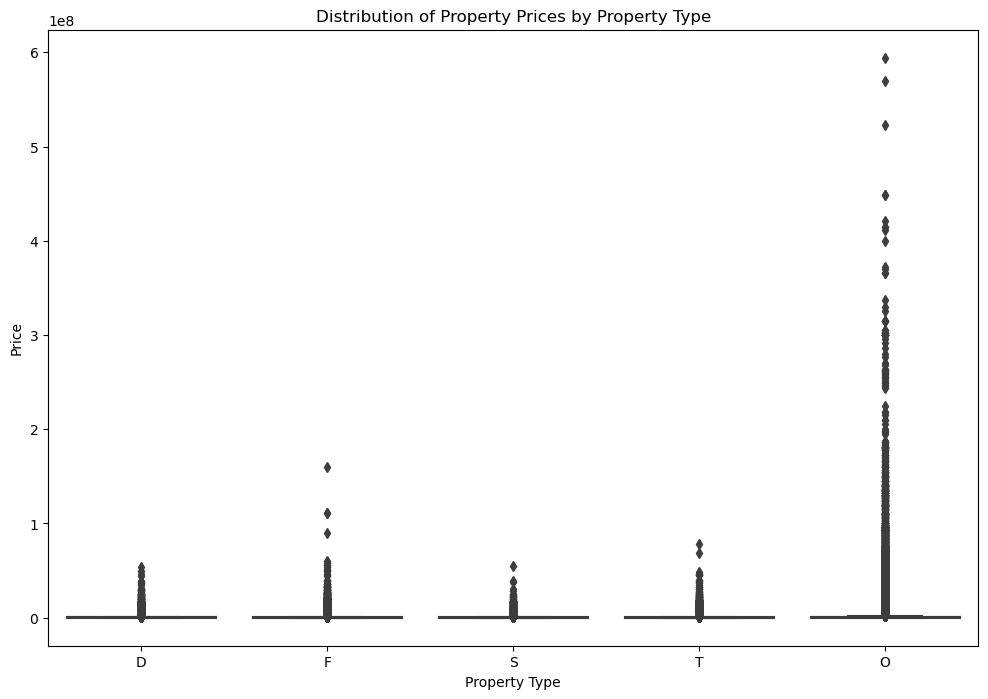

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Property_Type', y='price', data=df_combined)
plt.title('Distribution of Property Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

##### Semi-detached, flat and terrace property types (S, F and T) shown that there are spesific properties in these types that have high prices. Other property (O) have wide range of price, presence many positive outliers. Detached property (D) has a consistent price and no extremely high-priced transaction.

### b) Trend in the number of transactions over years

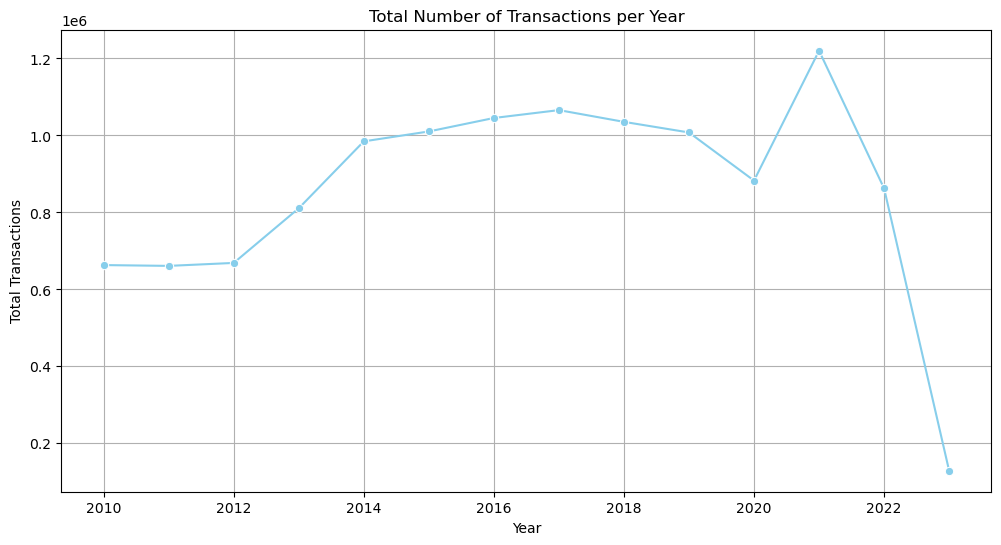

In [ ]:
df_combined['Year'] = df_combined['Date_of_Transfer'].dt.year

# Group by year and count the number of transactions
transactions_per_year = df_combined['Year'].value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=transactions_per_year.index, y=transactions_per_year.values, marker='o', color='skyblue')
plt.title('Total Number of Transactions per Year')
plt.xlabel('Year')
plt.ylabel('Total Transactions')
plt.grid(True)
plt.show()

##### The highest number of transaction was in 2021. 2023 is the lowest number of transaction because the data is only from January to April.

### c) Common property types in the top 20 districts

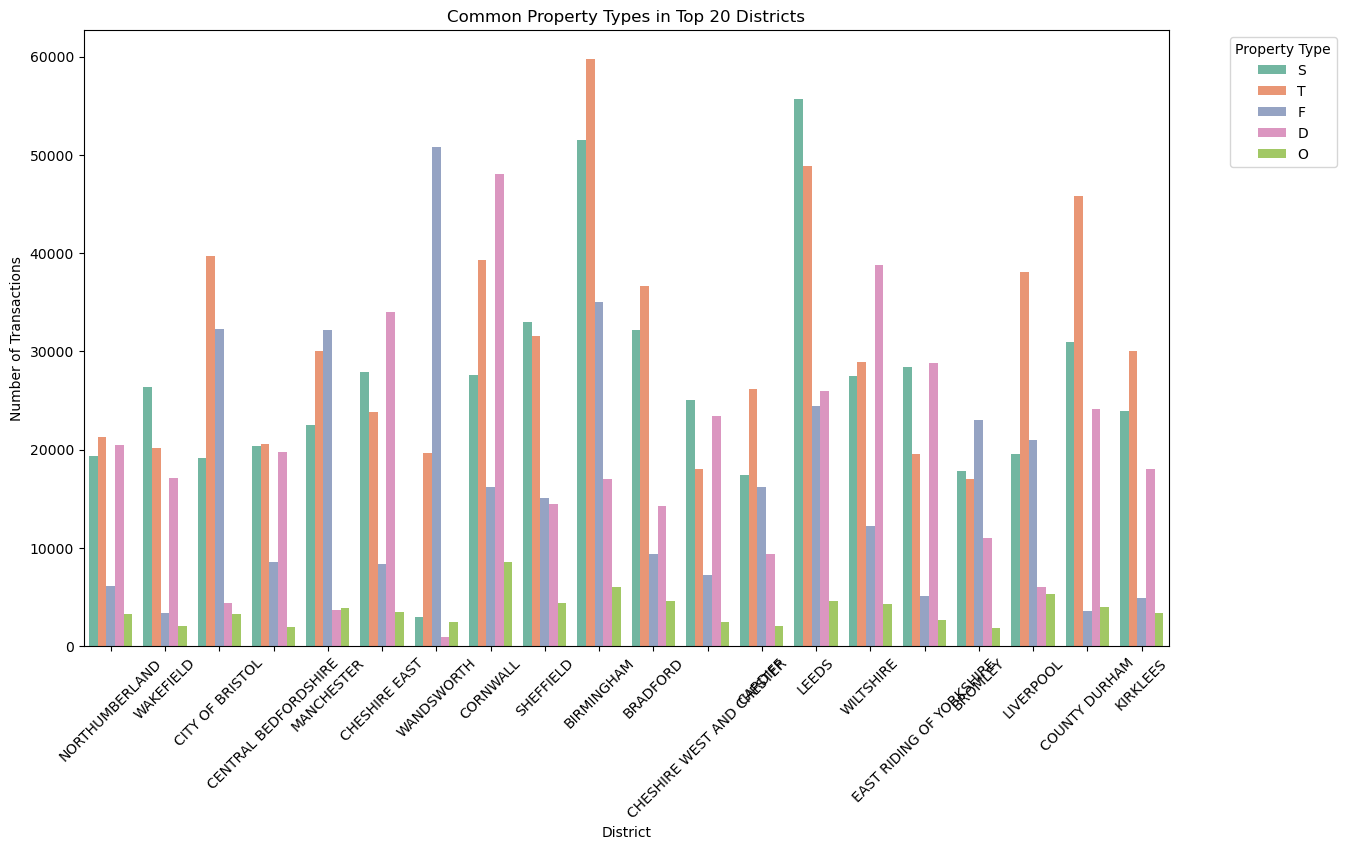

In [ ]:
# Identify the top 20 districts based on the number of transactions
top_20_districts = df_combined['District'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 districts
df_top_20_districts = df_combined[df_combined['District'].isin(top_20_districts)]

# Visualization 4: Common property types in the top 20 districts
plt.figure(figsize=(14, 8))
sns.countplot(x='District', hue='Property_Type', data=df_top_20_districts, palette='Set2')
plt.title('Common Property Types in Top 20 Districts')
plt.xlabel('District')
plt.ylabel('Number of Transactions')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


##### Birmingham has the highest property of Terrace(T). Leeds has the highest property of Semi-Detached(S). Cornwall has same number of Terraced(T) and Detached(D) properties.

### d) Proportion of new and old properties

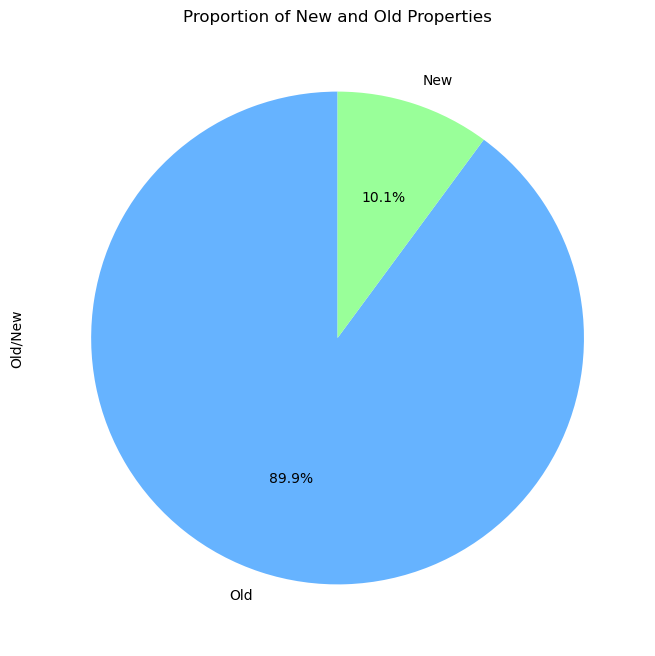

In [ ]:
# Visualization: Proportion of new and old properties (Pie Chart)
plt.figure(figsize=(8, 8))
labels = ['Old', 'New']
df_combined['Old/New'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=90, labels=labels)
plt.title('Proportion of New and Old Properties')
plt.show()



##### The majority of the properties falled under 'Old' category with the percentage of 89.8% and the new properties only 10.2%.

### e) Proportion of new and old properties in the top 20 counties

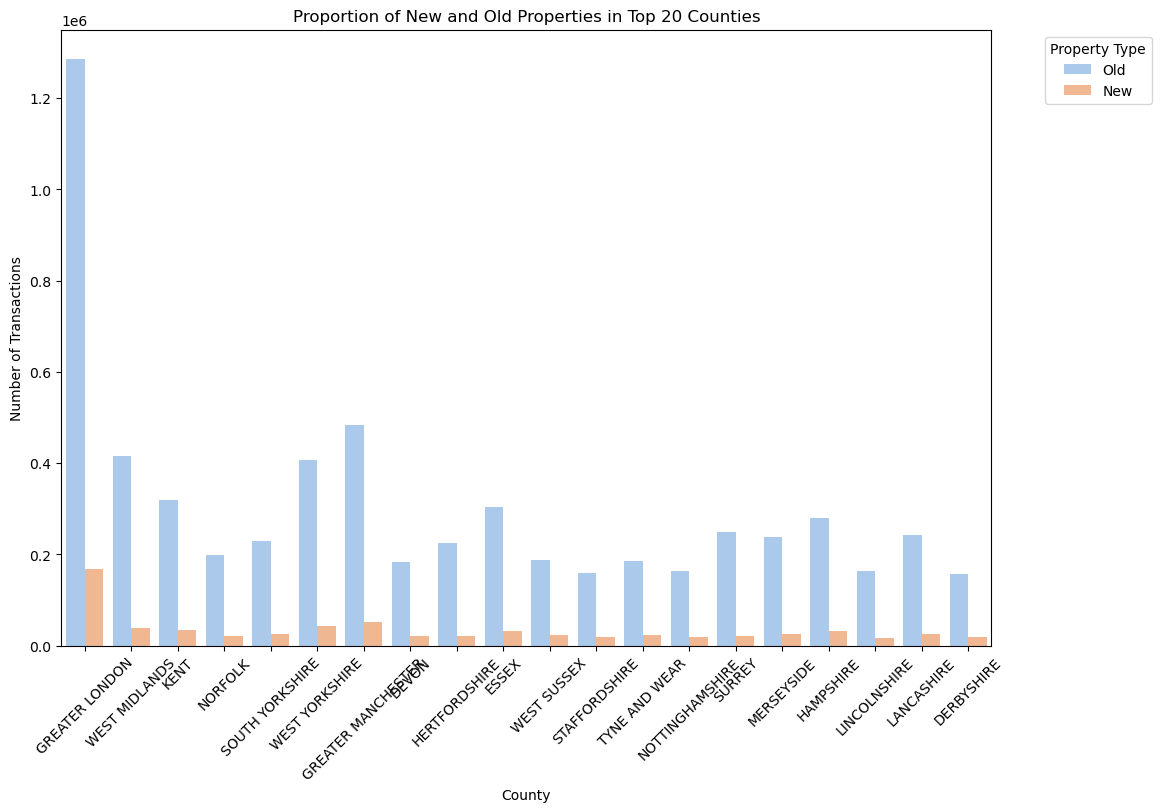

In [ ]:
# Identify the top 20 counties based on the number of transactions
top_20_counties = df_combined['County'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 counties
df_top_20_counties = df_combined[df_combined['County'].isin(top_20_counties)]

# Visualization 5: Proportion of new and old properties in the top 20 counties
plt.figure(figsize=(12, 8))
sns.countplot(x='County', hue='Old/New', data=df_top_20_counties, palette='pastel')
plt.title('Proportion of New and Old Properties in Top 20 Counties')
plt.xlabel('County')
plt.ylabel('Number of Transactions')

# Adding custom legend labels
legend_labels = ['Old', 'New']
plt.legend(title='Property Type', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.show()


##### Greater London has the highest number of old properties and also the highest number of new properties.

### f) Top 20 counties transaction

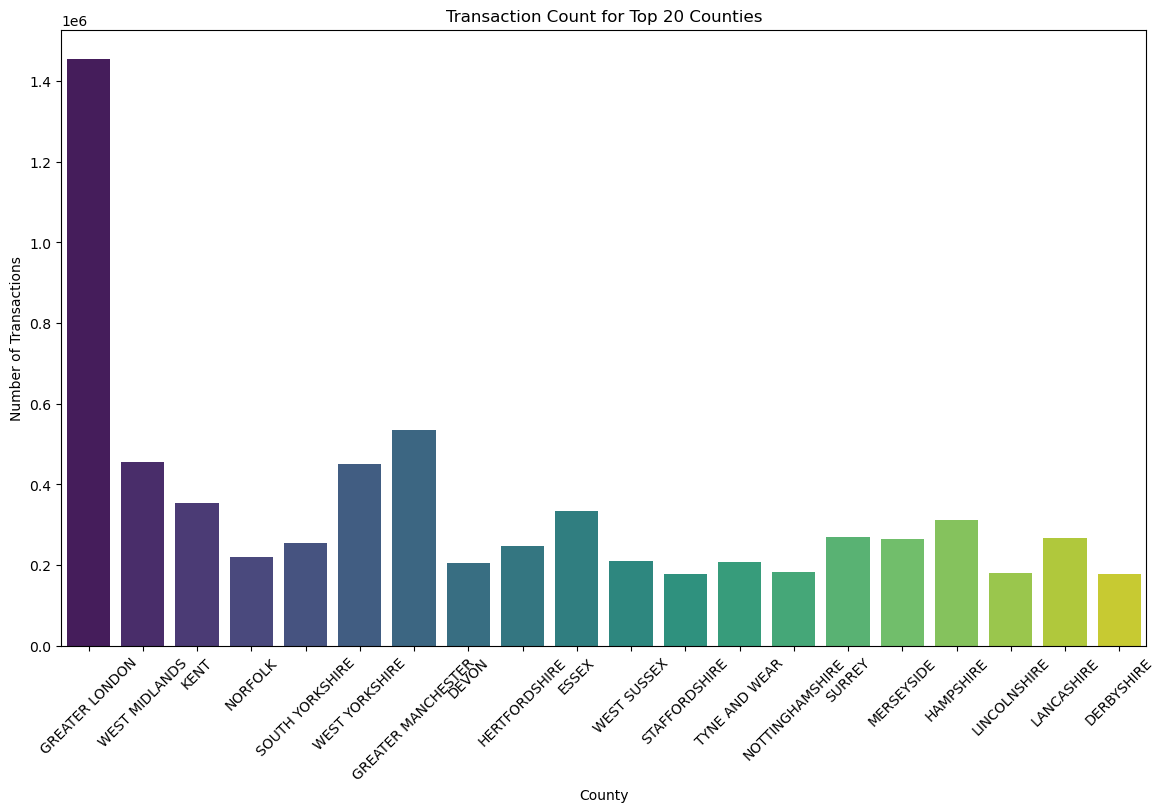

In [ ]:
# Identify the top 20 counties based on the number of transactions
top_20_counties = df_combined['County'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 counties
df_top_20_counties = df_combined[df_combined['County'].isin(top_20_counties)]

# Visualization: Bar plot of transaction count for top 20 counties
plt.figure(figsize=(14, 8))
sns.countplot(x='County', data=df_top_20_counties, palette='viridis')
plt.title('Transaction Count for Top 20 Counties')
plt.xlabel('County')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

##### Greater London has the highest number of transactions. This shown that many people choose to live there. Greater London has many type of occomondations so people mostly choose London as their home.  

### g) Number of properties by county

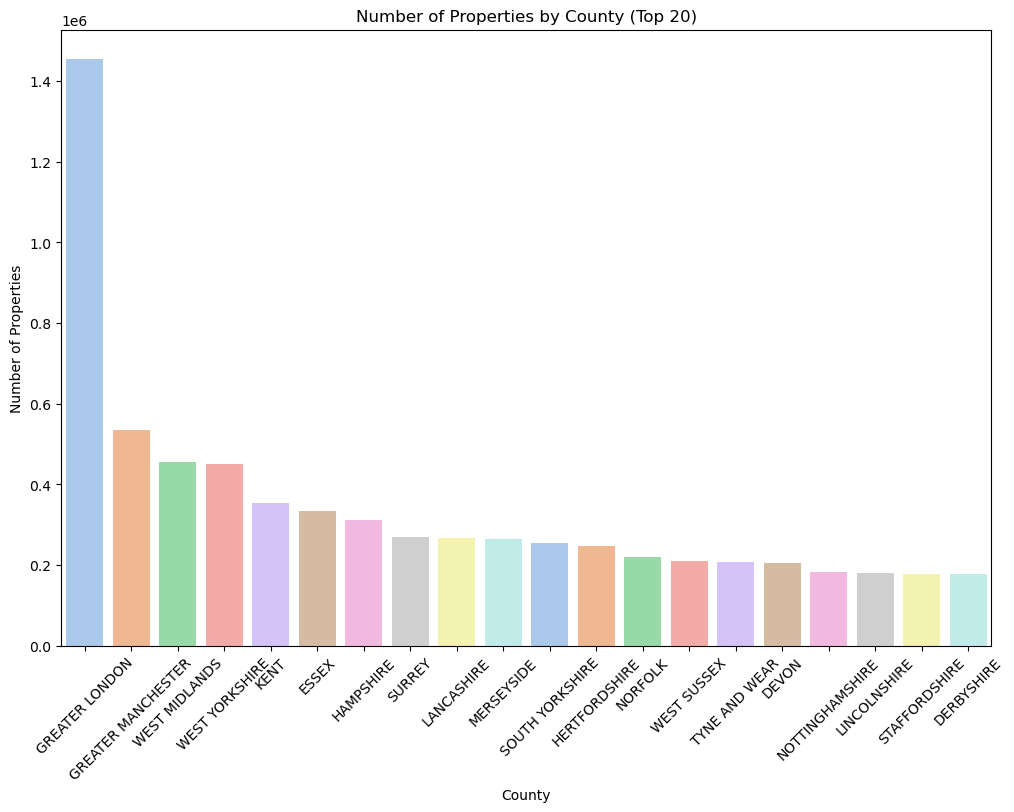

In [ ]:
# Get the top 20 counties based on the total number of properties
top_20_counties = df_combined['County'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 counties
df_top_20_counties = df_combined[df_combined['County'].isin(top_20_counties)]

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='County', data=df_top_20_counties, order=top_20_counties, palette='pastel')
plt.title('Number of Properties by County (Top 20)')
plt.xlabel('County')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()

##### Greater London has the highest number of propertis while Derbyshire, Stffordshire, Lincolnshire, Nottinghamshire and Devon are the lowest with the total number of properties are same.

### 16. Feature Engineering
##### Add column for Transaction_Year and Transaction_Month from column Date_of_Transfer

In [ ]:
df_combined['Date_of_Transfer'] = pd.to_datetime(df_combined['Date_of_Transfer'])
df_combined['Transaction_Year'] = df_combined['Date_of_Transfer'].dt.year
df_combined['Transaction_Month'] = df_combined['Date_of_Transfer'].dt.month


In [ ]:
df_combined.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,PAON,SAON,Street,Locality,Town/City,District,County,Year,Transaction_Year,Transaction_Month
0,{FC5E69E2-8DBB-486F-8D48-A360B8465A0C},175000,2010-02-19,LE18 3QG,D,N,72,NaN,WINSLOW DRIVE,NaN,WIGSTON,OADBY AND WIGSTON,LEICESTERSHIRE,2010,2010,2
1,{A64D7F40-CCB7-4D67-8EDE-A360D6089455},420000,2010-02-10,NW3 1RX,F,N,32,FIRST FLOOR FLAT,CARLINGFORD ROAD,NaN,LONDON,CAMDEN,GREATER LONDON,2010,2010,2
2,{C3D0ED4E-9960-4EE1-B1B0-98AA56EE9EBE},55000,2010-08-12,PL2 2SD,F,N,5,NaN,KIRKSTALL CLOSE,NaN,PLYMOUTH,CITY OF PLYMOUTH,CITY OF PLYMOUTH,2010,2010,8
3,{FD815C8C-041A-4536-9275-9C3F657D39BF},221000,2010-10-01,MK19 6AT,S,N,1,NaN,RIVERCREST ROAD,OLD STRATFORD,MILTON KEYNES,SOUTH NORTHAMPTONSHIRE,NORTHAMPTONSHIRE,2010,2010,10
4,{BEFC8B35-7BC0-48ED-9832-9C3F81811B0E},183500,2010-07-20,B63 1DU,S,N,14,NaN,CHERRY TREE LANE,NaN,HALESOWEN,DUDLEY,WEST MIDLANDS,2010,2010,7


### 17. Summary statistic
##### The only numeric data type in the dataset is Price

In [ ]:
# Assuming df_combined is the combined DataFrame
price_stats = df_combined['price'].describe()

# Additional statistics
price_stats['median'] = df_combined['price'].median()
price_stats['std_dev'] = df_combined['price'].std()

# Display the computed statistics
print(price_stats)


count      1.204762e+07
mean       3.204914e+05
std        1.312879e+06
min        1.000000e+00
25%        1.400000e+05
50%        2.180000e+05
75%        3.400000e+05
max        5.943000e+08
median     2.180000e+05
std_dev    1.312879e+06
Name: price, dtype: float64


##### This is the statistic of the Price. With the count of 12,047,620 number of transaction, the minimum property price is 1.00 and the maximum property price is 594,300,00.00. The average price of properties is approximately 320,491.40.

### 18. Data Exploration

In [ ]:
# Explore the structure of the dataset
df_combined.info()

# Summary statistics for relevant numerical variables
price_stats = df_combined['price'].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12047624 entries, 0 to 12047623
Data columns (total 16 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   Transaction_unique_identifier  object        
 1   price                          int64         
 2   Date_of_Transfer               datetime64[ns]
 3   postcode                       object        
 4   Property_Type                  object        
 5   Old/New                        object        
 6   PAON                           object        
 7   SAON                           object        
 8   Street                         object        
 9   Locality                       object        
 10  Town/City                      object        
 11  District                       object        
 12  County                         object        
 13  Year                           int64         
 14  Transaction_Year               int64         
 15  Transaction_M

##### a) Count of Property Types

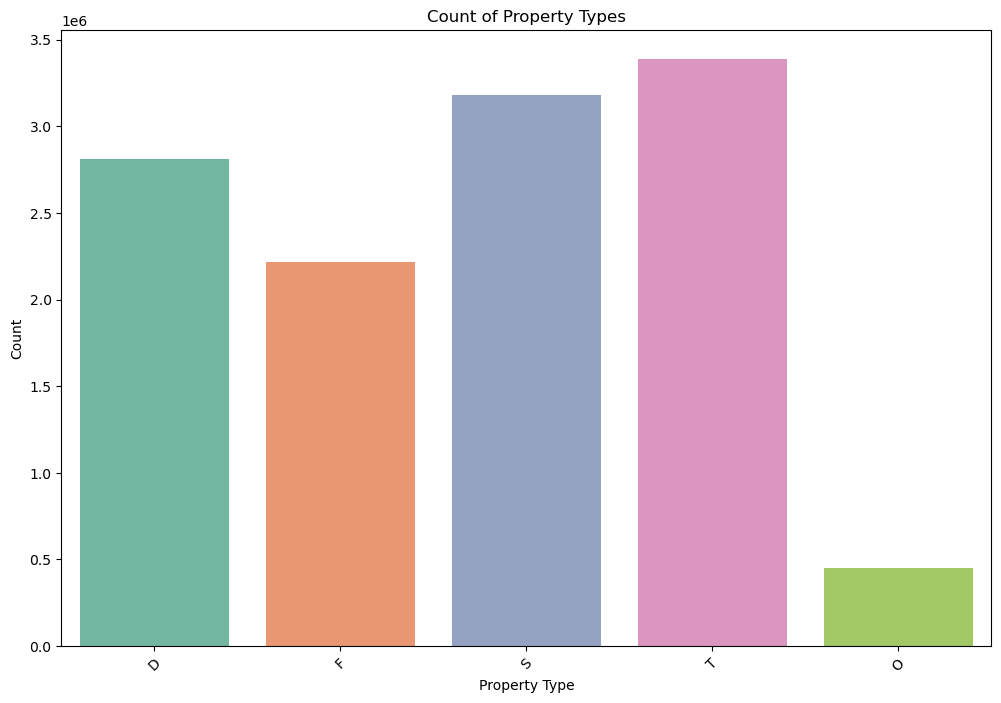

In [ ]:
# Explore categorical variables
# Count plots for 'Property_Type', 'Old/New', etc.
plt.figure(figsize=(12, 8))
sns.countplot(x='Property_Type', data=df_combined, palette='Set2')
plt.title('Count of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### Type T property is the most common type, followed by type S and the least common is O type.

##### b) Heatmap for correlation matrix

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10844\3955298050.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_combined.corr()


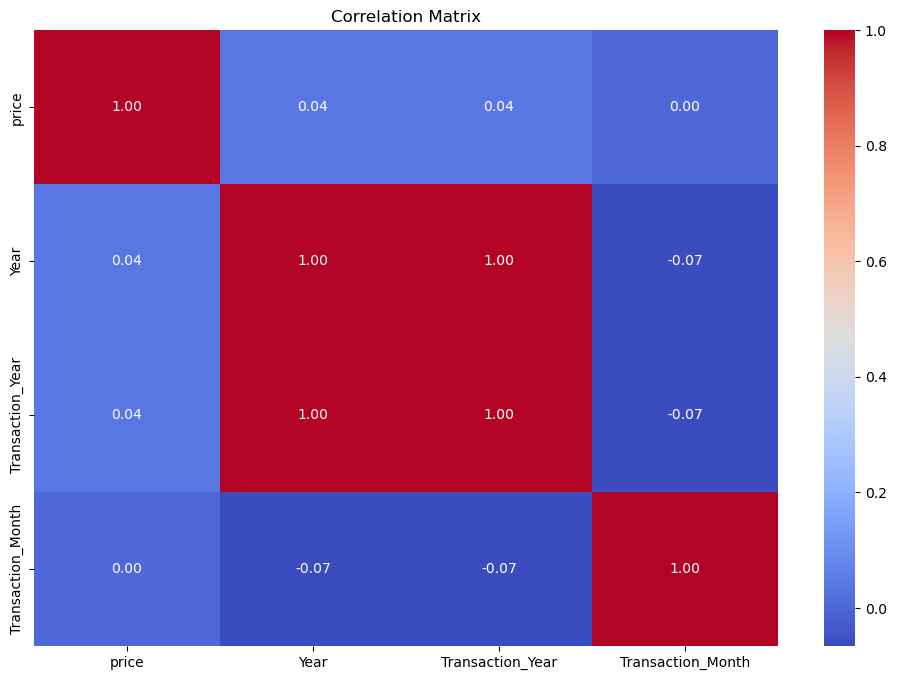

In [ ]:
# Correlation matrix for numerical variables
correlation_matrix = df_combined.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##### The correlation between property prices and transaction year is very weak and positive, indicating a minor upward trend in prices over time. Property prices and transaction month do not have a clear linear relationship.

Reference:
1. https://www.w3docs.com/snippets/python/change-column-type-in-pandas.html#:~:text=In%20pandas%2C%20you%20can%20change,are%20the%20new%20data%20types.&text=You%20can%20also%20use%20the,change%20datetime%20type%20of%20column.
2. https://stackoverflow.com/questions/51065979/delete-rows-with-dates-before-the-required-date-point-based-on-key-value
